C:\Users\JngyEn\AppData\Local\Temp\ipykernel_27288\717555509.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='作物类型', y='平均销售单价', data=merged_data, palette="Set2", showfliers=False)
C:\Users\JngyEn\AppData\Local\Temp\ipykernel_27288\717555509.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='作物类型', y='平均销售单价', data=merged_data, palette="Set2",


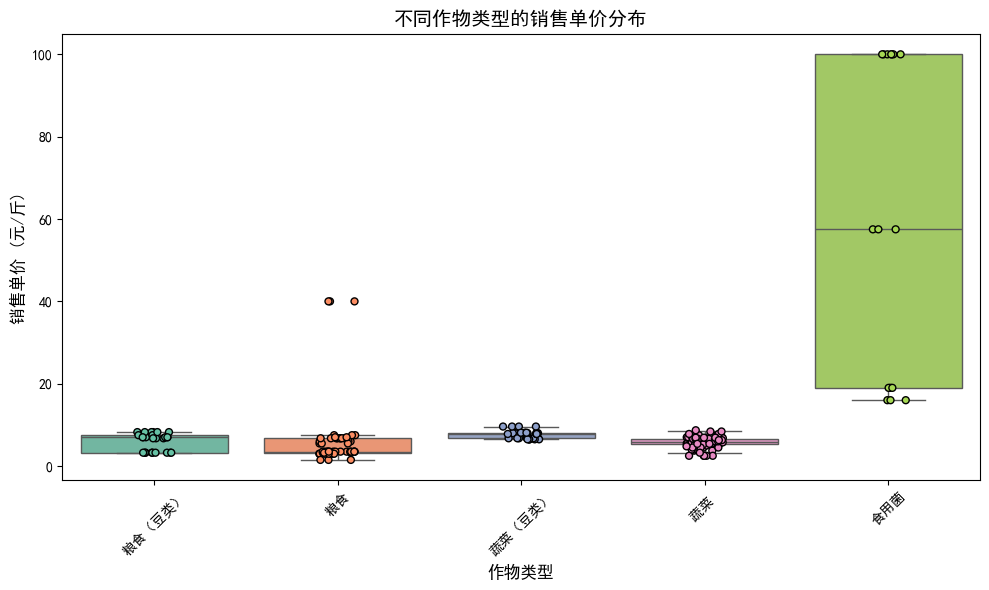

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取Excel文件
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据输入
excel_data = pd.ExcelFile("C:/Users/JngyEn/Downloads/2024/C题/附件2.xlsx")

# 设定调色板，选择符合论文要求的调色方案
custom_palette = sns.color_palette("Set1")

# 解析两个工作表的数据
sheet1_data = excel_data.parse('2023年的农作物种植情况')
sheet2_data = excel_data.parse('2023年统计的相关数据')

# 提取并计算平均销售单价
def extract_average_price(price_range):
    try:
        low, high = map(float, price_range.split('-'))
        return (low + high) / 2
    except:
        return float(price_range)

# 计算平均销售单价
sheet2_data['平均销售单价'] = sheet2_data['销售单价/(元/斤)'].apply(extract_average_price)

# 合并两个表格，基于'作物编号'
merged_data = pd.merge(sheet1_data[['作物编号', '作物类型']], sheet2_data, on='作物编号', how='right')

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制箱线图，不显示数据点
sns.boxplot(x='作物类型', y='平均销售单价', data=merged_data, palette="Set2", showfliers=False)

# 叠加散点图，显示每个数据点，颜色与箱线图一致，带黑色描边
sns.stripplot(x='作物类型', y='平均销售单价', data=merged_data, palette="Set2", 
              size=5, jitter=True, edgecolor="black", linewidth=1)

# 设置标题和标签
plt.title('不同作物类型的销售单价分布', fontsize=14)
plt.ylabel('销售单价 (元/斤)', fontsize=12)
plt.xlabel('作物类型', fontsize=12)

# 调整X轴标签角度
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()
